In [ ]:
# SQL exercise extracted from the tutorial: https://www.youtube.com/watch?v=nKPbfIU442g
# using Northwind database located: https://en.wikiversity.org/wiki/Database_Examples/Northwind/SQLite
# special thanks to dalto

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("C:/Northwind.db")

# we want to know the most profitable product

query = '''
SELECT ProductName, SUM(Price * Quantity) as Revenue
FROM OrderDetails od
JOIN Products p ON p.ProductID = od.ProductID
GROUP BY od.ProductID
ORDER BY Revenue DESC
LIMIT 1
'''

top_product = pd.read_sql_query(query,conn)

print("most profitable product is:\n",top_product)

most profitable product is:
      ProductName  Revenue
0  Côte de Blaye  62976.5


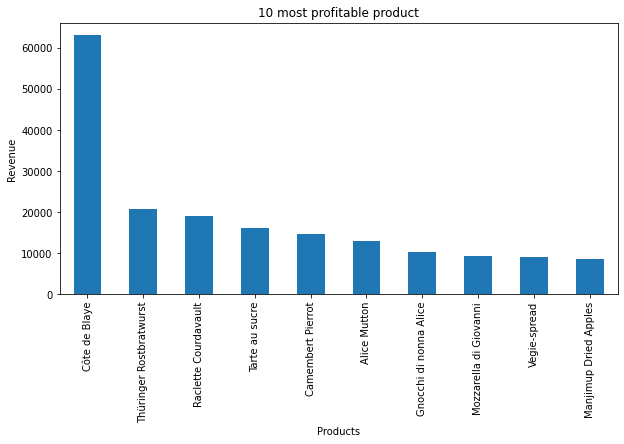

In [2]:
# we want to know the 10 most profitable products

query_2 = '''
SELECT ProductName, SUM(Price * Quantity) as Revenue
FROM OrderDetails od
JOIN Products p ON p.ProductID = od.ProductID
GROUP BY od.ProductID
ORDER BY Revenue DESC
LIMIT 10
'''
top_products = pd.read_sql_query(query_2, conn)

top_products.plot(x="ProductName",
                  y="Revenue",
                  kind = "bar",
                  figsize =(10,5),
                  legend = False
                  )

plt.title("10 most profitable product")
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.xticks(rotation = 90)
plt.show()

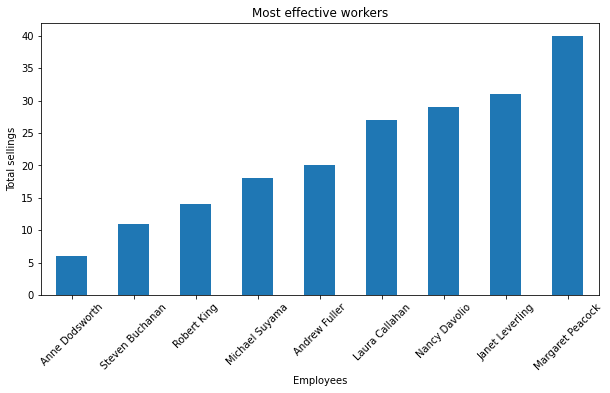

In [3]:
# we want to know the most effective worker

query_3 = '''
    SELECT firstName || " " || LastName as Employee, COUNT(*) as TOTAL
    FROM Orders o
    JOIN Employees e
    ON e.EmployeeID = o.EmployeeID
    GROUP BY o.EmployeeID
    Order BY TOTAL
'''

top_employees = pd.read_sql_query(query_3, conn)

top_employees.plot(x="Employee",
                   y="TOTAL",
                   kind = "bar",
                   figsize = (10,5),
                   legend = False
                   )

plt.title("Most effective workers")
plt.xlabel("Employees")
plt.ylabel("Total sellings")
plt.xticks(rotation = 45)

plt.show()